# Exercise 6.4

# Table of Contents

1. Import Libraries and Data
2. Data Prep
3. Data Analysis

# 1. Import Libraries and Data

In [1]:
# Import coding libraries
import pandas as pd
import numpy as np
import os

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

# Import machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Confirm execution
print(f'Import libraries completed')

Import libraries completed


In [2]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Define and execute DataFrame verification function.
def verify_df(df):
    '''
    Prints the shape and the first n rows of a DataFrame.
    
    Parameters:
    DF : The DataFrame to display.
    n (int) : The number of rows to display from the top of the DataFrame. Default is 5.
    '''
    print(f'Shape of the DataFrame: {df.shape}')
    print(f'\nDataFrame Preview:\n', df)

In [3]:
# Import PKL as a DataFrame.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.08.01 University Ranking Analysis/'
file_name = 'ARWU_Prepared.pkl'
df_arwu = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', file_name))
df_arwu

,world_rank,university_name,country,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,United States of America,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,United Kingdom,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,United States of America,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",United States of America,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology,United States of America,4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
4892,401-500,University of Trieste,Italy,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015
4893,401-500,University of Zaragoza,Spain,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015
4894,401-500,Wayne State University,United States of America,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015
4895,401-500,Vienna University of Technology,Austria,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015


In [4]:
# Import PKL as a DataFrame.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.08.01 University Ranking Analysis/'
file_name = 'combined_rankings_12_15.pkl'
df_rankings_1215 = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', file_name))
df_rankings_1215

,ranking_institution,year,world_rank,university,country/region,score
0,CWUR,2012,1,Harvard University,United States of America,100.00
1,CWUR,2012,2,Massachusetts Institute of Technology,United States of America,91.67
2,CWUR,2012,3,Stanford University,United States of America,89.50
3,CWUR,2012,4,University of Cambridge,United Kingdom,86.17
4,CWUR,2012,5,California Institute of Technology,United States of America,85.21
...,...,...,...,...,...,...
1196,ARWU,2015,96,McMaster University,Canada,24.40
1197,ARWU,2015,97,University of Bonn,Germany,24.30
1198,ARWU,2015,98,VU University Amsterdam,Netherlands,24.20
1199,ARWU,2015,99,Michigan State University,United States of America,24.00


In [5]:
# Import PKL as a DataFrame.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.08.01 University Ranking Analysis/'
file_name = 'CWUR_Prepared.pkl'
df_cwur = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', file_name))
df_cwur

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [6]:
# Import PKL as a DataFrame.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.08.01 University Ranking Analysis/'
file_name = 'Times_Prepared.pkl'
df_times = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', file_name))
df_times

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


# 2. Data Prep

## 1. All Rankings

### 1. All Rankings DataFrame

In [7]:
# Review all variables
df_arwu.columns

Index(['world_rank', 'university_name', 'country', 'national_rank',
       'total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year'],
      dtype='object')

In [8]:
df_cwur.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [9]:
df_times.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [10]:
# Rename variables
df_arwu.rename(columns = {
	'university_name': 'institution',
    'alumni': 'arwu_alumni_score',
    'award': 'arwu_award_score',
    'hici': 'arwu_hici_score',
    'ns': 'arwu_ns_score',
    'pub': 'arwu_pub_score',
    'pcp': 'arwu_pcp_score'}, inplace = True)
df_arwu

,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,year
0,1,Harvard University,United States of America,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,United Kingdom,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,United States of America,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",United States of America,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology,United States of America,4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
4892,401-500,University of Trieste,Italy,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015
4893,401-500,University of Zaragoza,Spain,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015
4894,401-500,Wayne State University,United States of America,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015
4895,401-500,Vienna University of Technology,Austria,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015


In [11]:
# Rename variables
df_cwur.rename(columns = {
	'score': 'total_score',
    'quality_of_education': 'cwur_education_rank',
    'alumni_employment': 'cwur_alumni_rank',
    'quality_of_faculty': 'cwur_faculty_rank',
    'publications': 'cwur_publications_rank',
    'influence': 'cwur_influence_rank',
    'citations': 'cwur_citations_rank',
    'broad_impact': 'cwur_impact_rank',
    'patents': 'cwur_patents_rank'}, inplace = True)
df_cwur

,world_rank,institution,country,national_rank,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,total_score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [12]:
# Rename variables
df_times.rename(columns = {
	'university_name': 'institution',
    'teaching': 'times_teaching_score',
    'international': 'times_international_score',
    'research': 'times_research_score',
    'citations': 'times_citations_score',
    'income': 'times_income_score',
    'num_students': 'times_students',
    'student_staff_ratio': 'times_staff_ratio',
    'international_students': 'times_percent_int_students',
    'female_male_ratio': 'times_female_male_ratio'}, inplace = True)
df_times

,world_rank,institution,country,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,total_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [13]:
# View variable data types
df_arwu.dtypes

world_rank            object
institution           object
country               object
national_rank         object
total_score          float64
arwu_alumni_score    float64
arwu_award_score     float64
arwu_hici_score      float64
arwu_ns_score        float64
arwu_pub_score       float64
arwu_pcp_score       float64
year                   int64
dtype: object

In [14]:
# View variable data types
df_cwur.dtypes

world_rank                  int64
institution                object
country                    object
national_rank               int64
cwur_education_rank         int64
cwur_alumni_rank            int64
cwur_faculty_rank           int64
cwur_publications_rank      int64
cwur_influence_rank         int64
cwur_citations_rank         int64
cwur_impact_rank          float64
cwur_patents_rank           int64
total_score               float64
year                        int64
dtype: object

In [15]:
# View variable data types
df_times.dtypes

world_rank                     object
institution                    object
country                        object
times_teaching_score          float64
times_international_score      object
times_research_score          float64
times_citations_score         float64
times_income_score             object
total_score                    object
times_students                 object
times_staff_ratio             float64
times_percent_int_students     object
times_female_male_ratio        object
year                            int64
dtype: object

In [16]:
# Update df_arwu variable datatypes
df_arwu['world_rank'] = pd.to_numeric(df_arwu['world_rank'], errors='coerce')
df_arwu['national_rank'] = pd.to_numeric(df_arwu['national_rank'], errors='coerce')
df_arwu.dtypes

world_rank           float64
institution           object
country               object
national_rank        float64
total_score          float64
arwu_alumni_score    float64
arwu_award_score     float64
arwu_hici_score      float64
arwu_ns_score        float64
arwu_pub_score       float64
arwu_pcp_score       float64
year                   int64
dtype: object

In [17]:
# Update df_cwur variable datatypes
df_cwur['world_rank'] = df_cwur['world_rank'].astype(float)
df_cwur['national_rank'] = df_cwur['national_rank'].astype(float)
df_cwur.dtypes

world_rank                float64
institution                object
country                    object
national_rank             float64
cwur_education_rank         int64
cwur_alumni_rank            int64
cwur_faculty_rank           int64
cwur_publications_rank      int64
cwur_influence_rank         int64
cwur_citations_rank         int64
cwur_impact_rank          float64
cwur_patents_rank           int64
total_score               float64
year                        int64
dtype: object

In [18]:
# Update df_times variable datatypes
df_times['world_rank'] = pd.to_numeric(df_times['world_rank'], errors='coerce')
df_times['times_international_score'] = pd.to_numeric(df_times['times_international_score'], errors='coerce')
df_times['times_income_score'] = pd.to_numeric(df_times['times_income_score'], errors='coerce')
df_times['total_score'] = pd.to_numeric(df_times['total_score'], errors='coerce')
df_times.dtypes

world_rank                    float64
institution                    object
country                        object
times_teaching_score          float64
times_international_score     float64
times_research_score          float64
times_citations_score         float64
times_income_score            float64
total_score                   float64
times_students                 object
times_staff_ratio             float64
times_percent_int_students     object
times_female_male_ratio        object
year                            int64
dtype: object

In [19]:
# Remove commas from times_students and convert to numeric
df_times['times_students'] = df_times['times_students'].str.replace(',', '')
df_times['times_students'] = pd.to_numeric(df_times['times_students'], errors='coerce')
df_times.dtypes

world_rank                    float64
institution                    object
country                        object
times_teaching_score          float64
times_international_score     float64
times_research_score          float64
times_citations_score         float64
times_income_score            float64
total_score                   float64
times_students                float64
times_staff_ratio             float64
times_percent_int_students     object
times_female_male_ratio        object
year                            int64
dtype: object

In [20]:
# Remove commas from times_students and convert to numeric
# Remove the percentage signs from times_percent_int_students and convert to numeric
df_times['times_percent_int_students'] = df_times['times_percent_int_students'].str.replace('%', '')
df_times['times_percent_int_students'] = pd.to_numeric(df_times['times_percent_int_students'], errors='coerce')
df_times['times_percent_int_students'] = df_times['times_percent_int_students'] / 100
df_times.dtypes

world_rank                    float64
institution                    object
country                        object
times_teaching_score          float64
times_international_score     float64
times_research_score          float64
times_citations_score         float64
times_income_score            float64
total_score                   float64
times_students                float64
times_staff_ratio             float64
times_percent_int_students    float64
times_female_male_ratio        object
year                            int64
dtype: object

In [21]:
# Convert times_female_male_ratio to numeric decimal
df_times['times_female_male_ratio'] = df_times['times_female_male_ratio'].replace('-', np.nan)
ratios = df_times['times_female_male_ratio'].str.split(' : ', expand=True)
ratios = ratios.astype(float)
df_times['times_female_male_ratio_decimal'] = ratios[0] / ratios[1]
df_times.dtypes

world_rank                         float64
institution                         object
country                             object
times_teaching_score               float64
times_international_score          float64
times_research_score               float64
times_citations_score              float64
times_income_score                 float64
total_score                        float64
times_students                     float64
times_staff_ratio                  float64
times_percent_int_students         float64
times_female_male_ratio             object
year                                 int64
times_female_male_ratio_decimal    float64
dtype: object

In [22]:
# Remove the old variable and rename the new variable
df_times.drop(columns=['times_female_male_ratio'], inplace=True)
df_times.rename(columns={'times_female_male_ratio_decimal': 'times_female_male_ratio'}, inplace=True)
df_times

,world_rank,institution,country,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,total_score,times_students,times_staff_ratio,times_percent_int_students,year,times_female_male_ratio
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,2011,NaN
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,2011,0.492537
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,2011,0.587302
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,2011,0.724138
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,2011,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,NaN,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,NaN,21958.0,15.3,0.03,2016,0.923077
2599,NaN,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,NaN,31268.0,28.7,0.02,2016,0.562500
2600,NaN,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,NaN,4122.0,3.7,0.03,2016,NaN
2601,NaN,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,NaN,10117.0,12.1,0.08,2016,0.388889


In [23]:
# Add a new 'ranking_institution' variables
df_arwu['ranking_institution'] = 'ARWU'
df_cwur['ranking_institution'] = 'CWUR'
df_times['ranking_institution'] = 'Times'

In [24]:
df_arwu

,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,year,ranking_institution
0,1.0,Harvard University,United States of America,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,ARWU
1,2.0,University of Cambridge,United Kingdom,1.0,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,ARWU
2,3.0,Stanford University,United States of America,2.0,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,ARWU
3,4.0,"University of California, Berkeley",United States of America,3.0,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,ARWU
4,5.0,Massachusetts Institute of Technology,United States of America,4.0,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,ARWU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,NaN,University of Trieste,Italy,NaN,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015,ARWU
4893,NaN,University of Zaragoza,Spain,NaN,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015,ARWU
4894,NaN,Wayne State University,United States of America,NaN,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015,ARWU
4895,NaN,Vienna University of Technology,Austria,NaN,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015,ARWU


In [25]:
df_cwur

,world_rank,institution,country,national_rank,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,total_score,year,ranking_institution
0,1.0,Harvard University,USA,1.0,7,9,1,1,1,1,NaN,5,100.00,2012,CWUR
1,2.0,Massachusetts Institute of Technology,USA,2.0,9,17,3,12,4,4,NaN,1,91.67,2012,CWUR
2,3.0,Stanford University,USA,3.0,17,11,5,4,2,2,NaN,15,89.50,2012,CWUR
3,4.0,University of Cambridge,United Kingdom,1.0,10,24,4,16,16,11,NaN,50,86.17,2012,CWUR
4,5.0,California Institute of Technology,USA,4.0,2,29,7,37,22,22,NaN,18,85.21,2012,CWUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996.0,University of the Algarve,Portugal,7.0,367,567,218,926,845,812,969.0,816,44.03,2015,CWUR
2196,997.0,Alexandria University,Egypt,4.0,236,566,218,997,908,645,981.0,871,44.03,2015,CWUR
2197,998.0,Federal University of Ceará,Brazil,18.0,367,549,218,830,823,812,975.0,824,44.03,2015,CWUR
2198,999.0,University of A Coruña,Spain,40.0,367,567,218,886,974,812,975.0,651,44.02,2015,CWUR


In [26]:
df_times

,world_rank,institution,country,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,total_score,times_students,times_staff_ratio,times_percent_int_students,year,times_female_male_ratio,ranking_institution
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,2011,NaN,Times
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,2011,0.492537,Times
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,2011,0.587302,Times
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,2011,0.724138,Times
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,2011,0.818182,Times
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,NaN,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,NaN,21958.0,15.3,0.03,2016,0.923077,Times
2599,NaN,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,NaN,31268.0,28.7,0.02,2016,0.562500,Times
2600,NaN,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,NaN,4122.0,3.7,0.03,2016,NaN,Times
2601,NaN,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,NaN,10117.0,12.1,0.08,2016,0.388889,Times


In [27]:
# Preview the outer join of df_arwu and df_cwur
pd.merge(df_arwu, df_cwur, on=['world_rank', 'institution', 'country', 'year', 'total_score', 'national_rank', 'ranking_institution'], how='outer')

,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,year,ranking_institution,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank
0,1.0,Harvard University,United States of America,1.0,100.00,100.0,100.0,100.0,100.0,100.0,72.4,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,University of Cambridge,United Kingdom,1.0,73.60,99.8,93.4,53.3,56.6,70.9,66.9,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Stanford University,United States of America,2.0,73.40,41.1,72.2,88.5,70.9,72.3,65.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,"University of California, Berkeley",United States of America,3.0,72.80,71.8,76.0,69.4,73.9,72.2,52.7,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Massachusetts Institute of Technology,United States of America,4.0,70.10,74.0,80.6,66.7,65.8,64.3,53.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,996.0,University of the Algarve,Portugal,7.0,44.03,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,367.0,567.0,218.0,926.0,845.0,812.0,969.0,816.0
7093,997.0,Alexandria University,Egypt,4.0,44.03,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,236.0,566.0,218.0,997.0,908.0,645.0,981.0,871.0
7094,998.0,Federal University of Ceará,Brazil,18.0,44.03,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,367.0,549.0,218.0,830.0,823.0,812.0,975.0,824.0
7095,999.0,University of A Coruña,Spain,40.0,44.02,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,367.0,567.0,218.0,886.0,974.0,812.0,975.0,651.0


In [28]:
# Outer join df_arwu and df_cwur
df_merge_ac = pd.merge(df_arwu, df_cwur, on=['world_rank', 'institution', 'country', 'year', 'total_score', 'national_rank', 'ranking_institution'], how='outer')
df_merge_ac

,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,year,ranking_institution,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank
0,1.0,Harvard University,United States of America,1.0,100.00,100.0,100.0,100.0,100.0,100.0,72.4,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,University of Cambridge,United Kingdom,1.0,73.60,99.8,93.4,53.3,56.6,70.9,66.9,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Stanford University,United States of America,2.0,73.40,41.1,72.2,88.5,70.9,72.3,65.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,"University of California, Berkeley",United States of America,3.0,72.80,71.8,76.0,69.4,73.9,72.2,52.7,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Massachusetts Institute of Technology,United States of America,4.0,70.10,74.0,80.6,66.7,65.8,64.3,53.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,996.0,University of the Algarve,Portugal,7.0,44.03,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,367.0,567.0,218.0,926.0,845.0,812.0,969.0,816.0
7093,997.0,Alexandria University,Egypt,4.0,44.03,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,236.0,566.0,218.0,997.0,908.0,645.0,981.0,871.0
7094,998.0,Federal University of Ceará,Brazil,18.0,44.03,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,367.0,549.0,218.0,830.0,823.0,812.0,975.0,824.0
7095,999.0,University of A Coruña,Spain,40.0,44.02,NaN,NaN,NaN,NaN,NaN,NaN,2015,CWUR,367.0,567.0,218.0,886.0,974.0,812.0,975.0,651.0


In [29]:
# Preview the outer join of df_merge_ac and df_times
pd.merge(df_merge_ac, df_times, on=['world_rank', 'institution', 'country', 'year', 'total_score', 'ranking_institution'], how='outer')

,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,year,ranking_institution,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,1.0,Harvard University,United States of America,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,University of Cambridge,United Kingdom,1.0,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Stanford University,United States of America,2.0,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,"University of California, Berkeley",United States of America,3.0,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Massachusetts Institute of Technology,United States of America,4.0,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,NaN,Yeungnam University,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,NaN,Yıldız Technical University,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,NaN,Yokohama City University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,NaN,Yokohama National University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [30]:
# Outer join df_merge_ac and df_times
df_complete = pd.merge(df_merge_ac, df_times, on=['world_rank', 'institution', 'country', 'year', 'total_score', 'ranking_institution'], how='outer')
df_complete

,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,year,ranking_institution,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,1.0,Harvard University,United States of America,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,University of Cambridge,United Kingdom,1.0,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Stanford University,United States of America,2.0,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,"University of California, Berkeley",United States of America,3.0,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Massachusetts Institute of Technology,United States of America,4.0,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,NaN,Yeungnam University,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,NaN,Yıldız Technical University,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,NaN,Yokohama City University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,NaN,Yokohama National University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [31]:
# Move the variable
var_year = df_complete.pop('year')
df_complete.insert(0, 'year', var_year)
df_complete

,year,world_rank,institution,country,national_rank,total_score,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,ranking_institution,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,2005,1.0,Harvard University,United States of America,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.4,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,2.0,University of Cambridge,United Kingdom,1.0,73.6,99.8,93.4,53.3,56.6,70.9,66.9,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,3.0,Stanford University,United States of America,2.0,73.4,41.1,72.2,88.5,70.9,72.3,65.0,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,4.0,"University of California, Berkeley",United States of America,3.0,72.8,71.8,76.0,69.4,73.9,72.2,52.7,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,5.0,Massachusetts Institute of Technology,United States of America,4.0,70.1,74.0,80.6,66.7,65.8,64.3,53.0,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2016,NaN,Yeungnam University,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,2016,NaN,Yıldız Technical University,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,2016,NaN,Yokohama City University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,2016,NaN,Yokohama National University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [32]:
# Move the variable
var_total_score = df_complete.pop('total_score')
df_complete.insert(4, 'total_score', var_total_score)
df_complete

,year,world_rank,institution,country,total_score,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,ranking_institution,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,2005,1.0,Harvard University,United States of America,100.0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,2.0,University of Cambridge,United Kingdom,73.6,1.0,99.8,93.4,53.3,56.6,70.9,66.9,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,3.0,Stanford University,United States of America,73.4,2.0,41.1,72.2,88.5,70.9,72.3,65.0,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,4.0,"University of California, Berkeley",United States of America,72.8,3.0,71.8,76.0,69.4,73.9,72.2,52.7,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,5.0,Massachusetts Institute of Technology,United States of America,70.1,4.0,74.0,80.6,66.7,65.8,64.3,53.0,ARWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2016,NaN,Yeungnam University,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,2016,NaN,Yıldız Technical University,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,2016,NaN,Yokohama City University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,2016,NaN,Yokohama National University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [33]:
# Move the variable
var_ranking_institution = df_complete.pop('ranking_institution')
df_complete.insert(0, 'ranking_institution', var_ranking_institution)
df_complete

,ranking_institution,year,world_rank,institution,country,total_score,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,ARWU,2005,1.0,Harvard University,United States of America,100.0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARWU,2005,2.0,University of Cambridge,United Kingdom,73.6,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARWU,2005,3.0,Stanford University,United States of America,73.4,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARWU,2005,4.0,"University of California, Berkeley",United States of America,72.8,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARWU,2005,5.0,Massachusetts Institute of Technology,United States of America,70.1,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,Times,2016,NaN,Yeungnam University,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,Times,2016,NaN,Yıldız Technical University,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,Times,2016,NaN,Yokohama City University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,Times,2016,NaN,Yokohama National University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [34]:
# Review unique 'country values
df_countries = sorted(df_complete['country'].unique())
print(df_countries)

['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macau', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Ireland', 'Romania', 'Russia', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'USA', 'Uganda', 'Ukraine', 'Unisted States of America', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Unted Kingdom', 'Uruguay']


In [35]:
# Unify duplicates
df_complete['country'] = df_complete['country'].replace({
    'Republic of Ireland': 'Ireland',
    'Russian Federation': 'Russia',
    'USA': 'United States of America',
    'Unisted States of America': 'United States of America',
    'Unted Kingdom': 'United Kingdom',
    'Slovak Republic': 'Slovakia'
})
df_countries = sorted(df_complete['country'].unique())
print(df_countries)

['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macau', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay']


In [36]:
df_complete.info

<bound method DataFrame.info of      ranking_institution  year  world_rank  \
0                   ARWU  2005         1.0   
1                   ARWU  2005         2.0   
2                   ARWU  2005         3.0   
3                   ARWU  2005         4.0   
4                   ARWU  2005         5.0   
...                  ...   ...         ...   
9695               Times  2016         NaN   
9696               Times  2016         NaN   
9697               Times  2016         NaN   
9698               Times  2016         NaN   
9699               Times  2016         NaN   

                                institution                   country  \
0                        Harvard University  United States of America   
1                   University of Cambridge            United Kingdom   
2                       Stanford University  United States of America   
3        University of California, Berkeley  United States of America   
4     Massachusetts Institute of Technology  Unite

In [37]:
df_complete.describe()

,year,world_rank,total_score,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
count,9700.000000,4414.000000,4502.000000,3828.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2603.000000,2594.000000,2603.000000,2603.000000,2385.000000,2544.000000,2544.000000,2536.000000,2367.000000
mean,2011.900722,266.376756,48.220762,28.165099,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,37.801498,52.007440,35.910257,60.921629,48.979874,23873.758648,18.445283,0.154440,inf
std,3.344954,290.852820,13.728549,42.774497,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,17.604218,22.103825,21.254805,23.073219,21.179938,17675.946877,11.458698,0.105915,NaN
min,2005.000000,1.000000,23.500000,1.000000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.900000,7.100000,2.900000,1.200000,24.200000,462.000000,0.600000,0.000000,0.010101
25%,2009.000000,53.000000,44.250000,3.000000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,24.700000,33.425000,19.600000,45.500000,33.000000,12637.750000,11.975000,0.080000,0.851852
50%,2013.000000,118.000000,45.565000,11.000000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,33.900000,50.300000,30.500000,62.500000,41.000000,20851.000000,16.100000,0.130000,1.083333
75%,2015.000000,448.750000,52.600000,36.000000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,46.400000,69.000000,47.250000,79.050000,59.000000,29991.000000,21.500000,0.210000,1.272727
max,2016.000000,1000.000000,100.000000,229.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,inf


In [38]:
# Replace 'inf' with NaN
df_complete['times_female_male_ratio'].replace(np.inf, np.nan, inplace=True)
df_complete.describe()

,year,world_rank,total_score,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
count,9700.000000,4414.000000,4502.000000,3828.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2603.000000,2594.000000,2603.000000,2603.000000,2385.000000,2544.000000,2544.000000,2536.000000,2365.000000
mean,2011.900722,266.376756,48.220762,28.165099,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,37.801498,52.007440,35.910257,60.921629,48.979874,23873.758648,18.445283,0.154440,1.068446
std,3.344954,290.852820,13.728549,42.774497,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,17.604218,22.103825,21.254805,23.073219,21.179938,17675.946877,11.458698,0.105915,0.406535
min,2005.000000,1.000000,23.500000,1.000000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.900000,7.100000,2.900000,1.200000,24.200000,462.000000,0.600000,0.000000,0.010101
25%,2009.000000,53.000000,44.250000,3.000000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,24.700000,33.425000,19.600000,45.500000,33.000000,12637.750000,11.975000,0.080000,0.851852
50%,2013.000000,118.000000,45.565000,11.000000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,33.900000,50.300000,30.500000,62.500000,41.000000,20851.000000,16.100000,0.130000,1.083333
75%,2015.000000,448.750000,52.600000,36.000000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,46.400000,69.000000,47.250000,79.050000,59.000000,29991.000000,21.500000,0.210000,1.272727
max,2016.000000,1000.000000,100.000000,229.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,3.545455


In [39]:
# Create variables to identify influential regions
# Initialize all new columns with 0
df_complete['Western Alignment'] = 0
df_complete['Chinese Alignment'] = 0
df_complete['Middle Eastern Alignment'] = 0
df_complete['No Alignment'] = 0

# Mapping of countries to their respective categories
western_alignment_countries = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Cyprus', 
                               'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
                               'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 
                               'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 
                               'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 
                               'United Kingdom', 'United States of America', 'Uruguay']

chinese_alignment_countries = ['China', 'Hong Kong', 'Indonesia', 'Japan', 'Macau', 'Malaysia', 'South Korea', 'Taiwan', 'Thailand']

middle_eastern_alignment_countries = ['Egypt', 'Iran', 'Jordan', 'Lebanon', 'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 
                                      'Turkey', 'United Arab Emirates', 'Pakistan']

no_alignment_countries = ['Bangladesh', 'Belarus', 'Brazil', 'Bulgaria', 'Ghana', 'India', 'Kenya', 'Mexico', 'Nigeria', 
                         'Russia', 'South Africa', 'Ukraine', 'Uganda']

# Assign 1 to the relevant group for each country
df_complete.loc[df_complete['country'].isin(western_alignment_countries), 'Western Alignment'] = 1
df_complete.loc[df_complete['country'].isin(chinese_alignment_countries), 'Chinese Alignment'] = 1
df_complete.loc[df_complete['country'].isin(middle_eastern_alignment_countries), 'Middle Eastern Alignment'] = 1
df_complete.loc[df_complete['country'].isin(no_alignment_countries), 'No Alignment'] = 1

# Check the result
df_complete

,ranking_institution,year,world_rank,institution,country,total_score,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio,Western Alignment,Chinese Alignment,Middle Eastern Alignment,No Alignment
0,ARWU,2005,1.0,Harvard University,United States of America,100.0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
1,ARWU,2005,2.0,University of Cambridge,United Kingdom,73.6,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
2,ARWU,2005,3.0,Stanford University,United States of America,73.4,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
3,ARWU,2005,4.0,"University of California, Berkeley",United States of America,72.8,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
4,ARWU,2005,5.0,Massachusetts Institute of Technology,United States of America,70.1,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,Times,2016,NaN,Yeungnam University,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077,1,1,0,0
9696,Times,2016,NaN,Yıldız Technical University,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500,0,0,1,0
9697,Times,2016,NaN,Yokohama City University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN,1,1,0,0
9698,Times,2016,NaN,Yokohama National University,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889,1,1,0,0


In [40]:
# Move variables
var_alignment_c = df_complete.pop('Chinese Alignment')
df_complete.insert(6, 'Chinese Alignment', var_alignment_c)
var_alignment_m = df_complete.pop('Middle Eastern Alignment')
df_complete.insert(7, 'Middle Eastern Alignment', var_alignment_m)
var_alignment_w = df_complete.pop('Western Alignment')
df_complete.insert(8, 'Western Alignment', var_alignment_w)
var_alignment_n = df_complete.pop('No Alignment')
df_complete.insert(9, 'No Alignment', var_alignment_n)
df_complete

,ranking_institution,year,world_rank,institution,country,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,ARWU,2005,1.0,Harvard University,United States of America,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARWU,2005,2.0,University of Cambridge,United Kingdom,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARWU,2005,3.0,Stanford University,United States of America,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARWU,2005,4.0,"University of California, Berkeley",United States of America,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARWU,2005,5.0,Massachusetts Institute of Technology,United States of America,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,Times,2016,NaN,Yeungnam University,South Korea,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
9696,Times,2016,NaN,Yıldız Technical University,Turkey,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
9697,Times,2016,NaN,Yokohama City University,Japan,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,NaN
9698,Times,2016,NaN,Yokohama National University,Japan,NaN,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889


In [41]:
# Export the data
file_name = 'Complete_Prepared.pkl'
file_path = os.path.join(folder_path, '02 Data', 'Prepared Data', file_name)
df_complete.to_pickle(file_path)
print(f'DataFrame exported to {file_path}.')

DataFrame exported to /Users/bertpearce/Documents/Python Projects/2024.08.01 University Ranking Analysis/02 Data/Prepared Data/Complete_Prepared.pkl.


In [42]:
# Drop records with NaN 'total_score'
df_regression = df_complete.dropna(subset=['total_score']).copy()
df_regression

,ranking_institution,year,world_rank,institution,country,total_score,Chinese Alignment,Middle Eastern Alignment,Western Alignment,No Alignment,national_rank,arwu_alumni_score,arwu_award_score,arwu_hici_score,arwu_ns_score,arwu_pub_score,arwu_pcp_score,cwur_education_rank,cwur_alumni_rank,cwur_faculty_rank,cwur_publications_rank,cwur_influence_rank,cwur_citations_rank,cwur_impact_rank,cwur_patents_rank,times_teaching_score,times_international_score,times_research_score,times_citations_score,times_income_score,times_students,times_staff_ratio,times_percent_int_students,times_female_male_ratio
0,ARWU,2005,1.0,Harvard University,United States of America,100.0,0,0,1,0,1.0,100.0,100.0,100.0,100.0,100.0,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARWU,2005,2.0,University of Cambridge,United Kingdom,73.6,0,0,1,0,1.0,99.8,93.4,53.3,56.6,70.9,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARWU,2005,3.0,Stanford University,United States of America,73.4,0,0,1,0,2.0,41.1,72.2,88.5,70.9,72.3,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARWU,2005,4.0,"University of California, Berkeley",United States of America,72.8,0,0,1,0,3.0,71.8,76.0,69.4,73.9,72.2,52.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARWU,2005,5.0,Massachusetts Institute of Technology,United States of America,70.1,0,0,1,0,4.0,74.0,80.6,66.7,65.8,64.3,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,Times,2016,NaN,Newcastle University,United Kingdom,49.2,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.9,84.3,27.5,81.5,34.7,20174.0,15.2,0.29,1.000000
9096,Times,2016,NaN,"St George’s, University of London",United Kingdom,49.2,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.6,69.5,18.1,100.0,37.7,2958.0,13.4,0.17,1.564103
9097,Times,2016,198.0,University of Trento,Italy,49.1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.8,55.9,27.4,87.7,47.1,16841.0,43.2,0.08,1.040816
9098,Times,2016,199.0,Paris Diderot University – Paris 7,France,48.9,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.5,64.9,22.9,91.0,29.0,27756.0,14.8,0.17,1.702703


### 2. Regression Analysis Prep

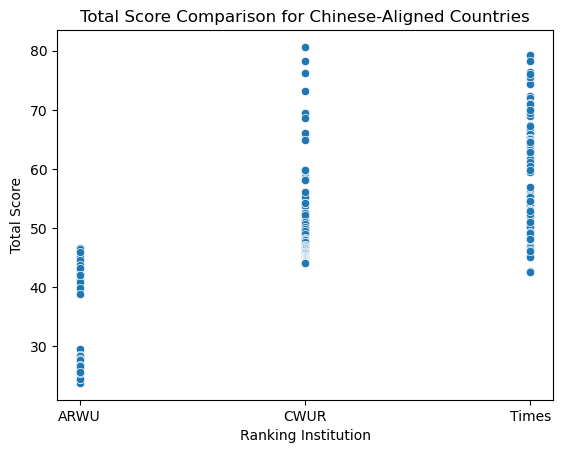

In [43]:
# Filter the data for Chinese-aligned countries
chinese_aligned_countries = df_regression[df_regression['Chinese Alignment'] == 1]

# Scatterplot for total score comparison across ranking institutions
sns.scatterplot(x='ranking_institution', y='total_score', data=chinese_aligned_countries)
plt.title('Total Score Comparison for Chinese-Aligned Countries')
plt.ylabel('Total Score')
plt.xlabel('Ranking Institution')
plt.show()

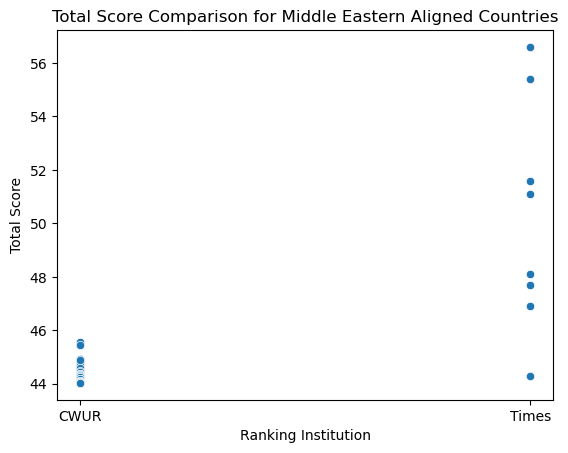

In [44]:
# Filter the data for Middle-Eastern-aligned countries
me_aligned_countries = df_complete[df_complete['Middle Eastern Alignment'] == 1]

# Scatterplot for total score comparison across ranking institutions
sns.scatterplot(x='ranking_institution', y='total_score', data=me_aligned_countries)
plt.title('Total Score Comparison for Middle Eastern Aligned Countries')
plt.ylabel('Total Score')
plt.xlabel('Ranking Institution')
plt.show()

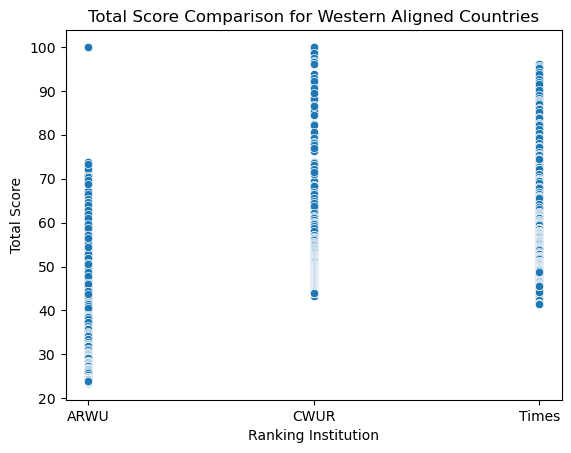

In [45]:
# Filter the data for Western-aligned countries
western_aligned_countries = df_complete[df_complete['Western Alignment'] == 1]

# Scatterplot for total score comparison across ranking institutions
sns.scatterplot(x='ranking_institution', y='total_score', data=western_aligned_countries)
plt.title('Total Score Comparison for Western Aligned Countries')
plt.ylabel('Total Score')
plt.xlabel('Ranking Institution')
plt.show()

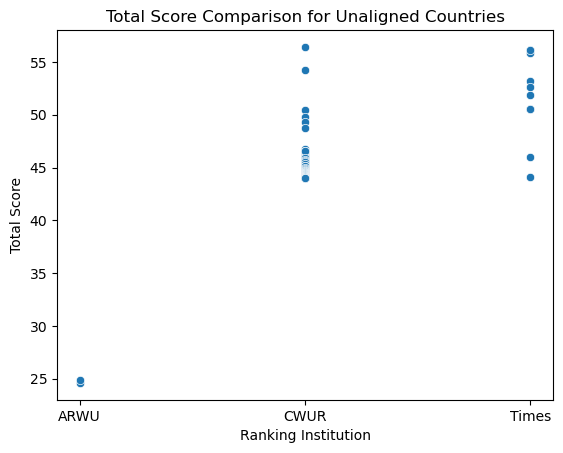

In [46]:
# Filter the data for non-aligned countries
not_aligned_countries = df_complete[df_complete['No Alignment'] == 1]

# Scatterplot for total score comparison across ranking institutions
sns.scatterplot(x='ranking_institution', y='total_score', data=not_aligned_countries)
plt.title('Total Score Comparison for Unaligned Countries')
plt.ylabel('Total Score')
plt.xlabel('Ranking Institution')
plt.show()

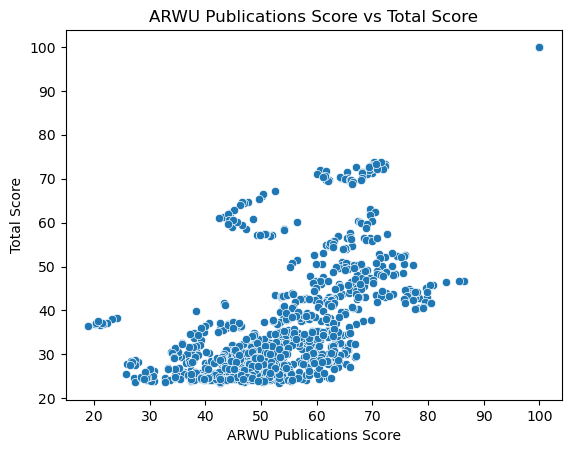

In [47]:
# Scatterplot for arwu_pub_score vs total_score
df_arwu_research = df_complete.dropna(subset=['arwu_pub_score', 'total_score'])
sns.scatterplot(x='arwu_pub_score', y='total_score', data=df_arwu_research)
plt.title('ARWU Publications Score vs Total Score')
plt.ylabel('Total Score')
plt.xlabel('ARWU Publications Score')
plt.show()

In [48]:
# Reshape the variables and split the data
Xa = df_arwu_research['arwu_pub_score'].values.reshape(-1,1)
ya = df_arwu_research['total_score'].values.reshape(-1,1)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3, random_state=0)

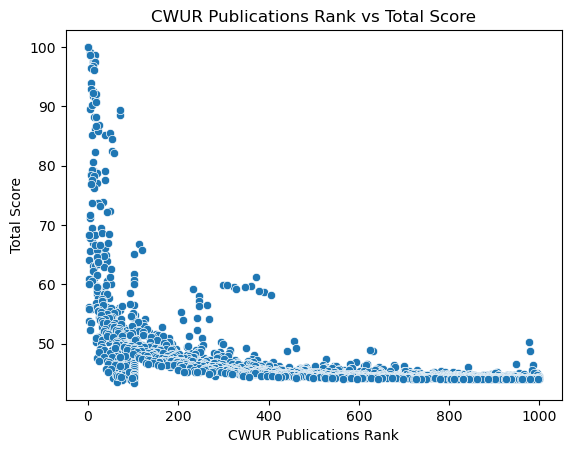

In [49]:
# Scatterplot for cwur_publications_rank vs total_score
sns.scatterplot(x='cwur_publications_rank', y='total_score', data=df_complete)
plt.title('CWUR Publications Rank vs Total Score')
plt.ylabel('Total Score')
plt.xlabel('CWUR Publications Rank')
plt.show()

In [50]:
# Reshape the variables and split the data
Xc = df_complete['cwur_publications_rank'].values.reshape(-1,1)
yc = df_complete['total_score'].values.reshape(-1,1)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=0)

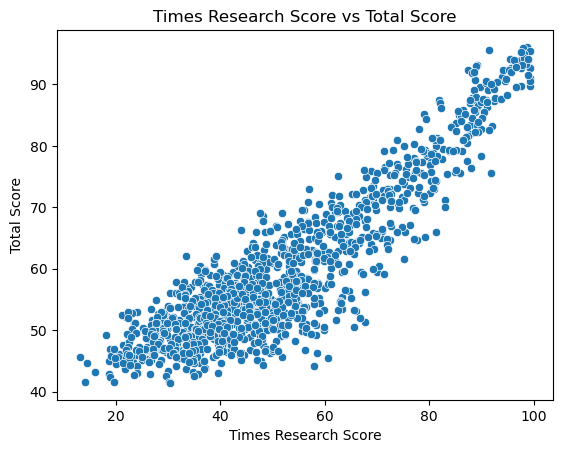

In [51]:
# Scatterplot for times_research_score vs total_score
sns.scatterplot(x='times_research_score', y='total_score', data=df_complete)
plt.title('Times Research Score vs Total Score')
plt.ylabel('Total Score')
plt.xlabel('Times Research Score')
plt.show()

In [52]:
# Reshape the variables and split the data
Xt = df_complete['times_research_score'].values.reshape(-1,1)
yt = df_complete['total_score'].values.reshape(-1,1)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.3, random_state=0)

#### Hypothesis

There is no significant increase in the average rankings assigned by the ARWU ranking institution to universities in Chinese-aligned countries, by the CWUR ranking institution to universities in Middle Eastern-aligned countries, or by the Times ranking institution to universities in Western-aligned countries, compared to the average rankings assigned to universities in those same regions by the other two ranking institutions.

# 3. Regression Analysis

In [53]:
# Create a regression object
regression_arwu = LinearRegression()
regression_arwu.fit(Xa_train, ya_train)

LinearRegression()

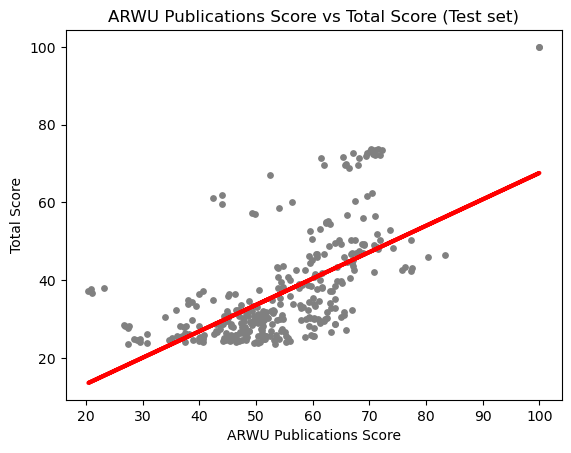

In [54]:
ya_predicted = regression_arwu.predict(Xa_test)
plot_test = plt
plot_test.scatter(Xa_test, ya_test, color='gray', s = 15)
plot_test.plot(Xa_test, ya_predicted, color='red', linewidth =3)
plot_test.title('ARWU Publications Score vs Total Score (Test set)')
plot_test.xlabel('ARWU Publications Score')
plot_test.ylabel('Total Score')
plot_test.show()

The distribution of the data points shows strong fluctuation, a sign that this probably isn't a strong model.

In [55]:
# Create and print model summary statistics.
rmse_arwu = mean_squared_error(ya_test, ya_predicted)
r2_arwu = r2_score(ya_test, ya_predicted)
print('Slope:' ,regression_arwu.coef_)
print('Mean squared error: ', rmse_arwu)
print('R2 score: ', r2_arwu)

Slope: [[0.67870519]]
Mean squared error:  115.08465290012828
R2 score:  0.3990814526595112


In [56]:
# Create a dataframe comparing the actual and predicted values of y.
data_arwu = pd.DataFrame({'Actual': ya_test.flatten(), 'Predicted': ya_predicted.flatten()})
data_arwu.head(30)

,Actual,Predicted
0,28.9,33.292868
1,50.4,45.509562
2,26.9,32.749904
3,25.9,31.188882
4,34.5,41.165848
5,73.1,47.274195
6,29.5,33.292868
7,24.1,19.718764
8,35.4,36.482783
9,27.2,34.378797


With a high MSE and a low R2 score, this model did not perform well on the test set. Considering the quantitative method for creating the publications score, bias seems unlikely, but more research could be done to assess which publications are considered valid and which ones aren't.

In [57]:
# Predict
ya_predicted_train = regression_arwu.predict(Xa_train)
rmse_arwu = mean_squared_error(ya_train, ya_predicted_train)
r2_arwu = r2_score(ya_train, ya_predicted_train)
print('Slope:' ,regression_arwu.coef_)
print('Mean squared error: ', rmse_arwu)
print('R2 score: ', r2_arwu)

Slope: [[0.67870519]]
Mean squared error:  109.77971778845738
R2 score:  0.3899209391907996


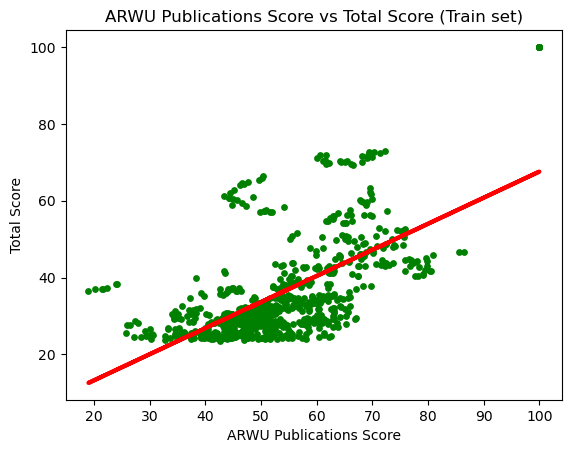

In [58]:
# Visualize training set results
plot_test = plt
plot_test.scatter(Xa_train, ya_train, color='green', s = 15)
plot_test.plot(Xa_train, ya_predicted_train, color='red', linewidth =3)
plot_test.title('ARWU Publications Score vs Total Score (Train set)')
plot_test.xlabel('ARWU Publications Score')
plot_test.ylabel('Total Score')
plot_test.show()